# **Feature Contributions with SHAP**

## Change Current Working Directory

In [1]:
import os
from pathlib import Path

project_root = Path('..').resolve()
os.chdir(project_root)

print('Current Working Directory:', project_root)

Current Working Directory: C:\Users\ibnum\Desktop\Material Learning\Portfolio Bagas\ML\Insurance Charges


## Import Modules

In [8]:
from src.model import interpret_model, save_load
from src.config import config
from src.data import split_data, load_data

## Load Model

In [4]:
# load model
insurance_model = save_load.load_object(path=config.MODEL_PATH)
insurance_model

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## SHAP Interpreter

Data loaded succesfully from data/processed/insurance_cleaned.csv!
Data shape: (1337, 8)
X_train shape: (1069, 6)
X_test shape: (268, 6)
y_train shape: (1069,)
y_test shape: (268,)


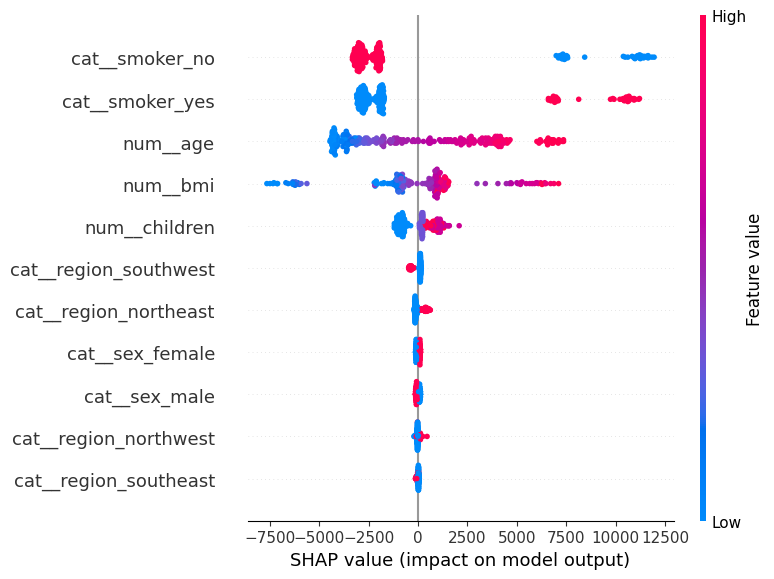

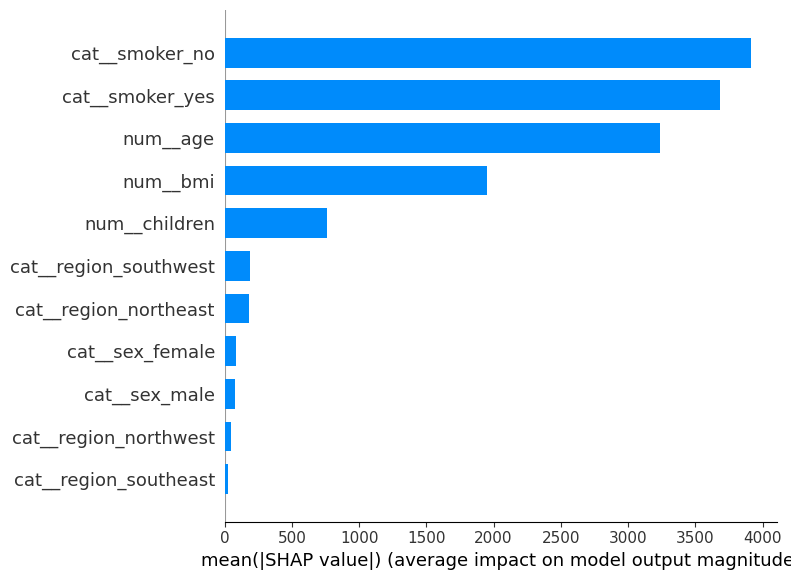

.values =
array([[-3616.44537714, -2163.58563136,   155.07914613, ...,
          111.66782687,    23.37377779,   114.22034868],
       [-3453.6644023 ,  -861.03854959,  -980.62059107, ...,
          -14.58710654,    38.16133502,    87.14204916],
       [-3535.58135856, -6001.92886112,  -663.65761636, ...,
           75.65800737,     6.79636378,    97.10499633],
       ...,
       [-1077.28284257, -1063.78850481,   186.53650903, ...,
           68.37138597,    23.1891576 ,   104.48561685],
       [-3629.25449581,  -619.74614086,  -889.12468608, ...,
          -27.75157384,    26.42770592,  -327.2357546 ],
       [-2237.58814506,  1383.48264854,   261.02786042, ...,
          -57.38038608,  -116.24122805,   119.19401327]], shape=(268, 11))

.base_values =
array([13330.66937659, 13330.66937659, 13330.66937659, 13330.66937659,
       13330.66937659, 13330.66937659, 13330.66937659, 13330.66937659,
       13330.66937659, 13330.66937659, 13330.66937659, 13330.66937659,
       13330.66937659, 

In [10]:
# need X_test as the explainer input
cleaned_df = load_data.read_data(file_path=config.CLEAN_DATA).drop(columns='Unnamed: 0')
_, X_test, _, _ = split_data.split_train_test(data=cleaned_df)

# load SHAP
shap_insurance = interpret_model.explain_model(
    model=insurance_model,
    X_test=X_test,
    mode='both'
)

# show explainer
shap_insurance